Average price list for sales
Interaquartile=9635.0  Q1=465.0  Q3=10100.0
No.of items not outliers are: 390
 Data without Outlier
     Avg Price
0        12100
1        10100
2        16100
3        20100
4         8100
..         ...
445       1300
446       2600
447       1600
448       1900
449       3100

[390 rows x 1 columns]


<Axes: ylabel='Avg Price'>

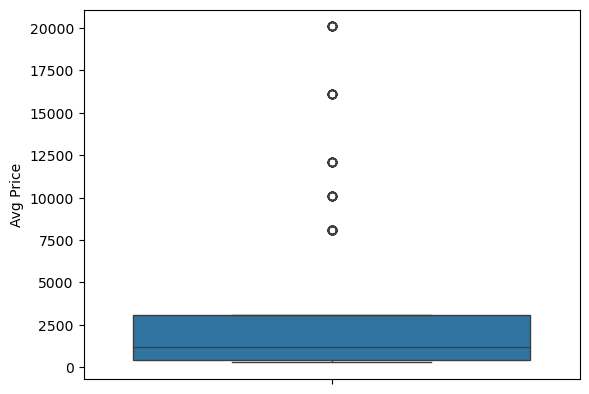

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sales_data_specifycol=pd.read_csv("Desktop/sales_data_with_discounts.csv",usecols=["Avg Price", "Total Sales Value", "Discount Rate (%)",
       "Discount Amount", "Net Sales Value"])   
print("Average price list for sales")
avg=pd.read_csv("Desktop/sales_data_with_discounts.csv",usecols=["Avg Price"])  
avgq1=sales_data_specifycol["Avg Price"].quantile(.25)
avgq3=sales_data_specifycol["Avg Price"].quantile(.75)
avgIQR=avgq3-avgq1
print("Interaquartile={}  Q1={}  Q3={}".format(avgIQR,avgq1,avgq3))
avglowerbound=avgq1-(1.5*(avgIQR))
avgupperbound=avgq3+(1.5*(avgIQR))
#Remove outliers
not_outlier_value=avg.loc[(avg["Avg Price"]>avglowerbound)&(avg["Avg Price"]<avgupperbound)]
print("No.of items not outliers are:",not_outlier_value.shape[0])
print(" Data without Outlier")
print(not_outlier_value)
sns.boxplot(not_outlier_value["Avg Price"])

C:\Users\rskar\AppData\Local\Temp\ipykernel_424\3488375173.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '24552.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  not_outlier_value.loc[(not_outlier_value["Avg Price"]>avgupperbound),"Avg Price"]=avgupperbound


<Axes: ylabel='Avg Price'>

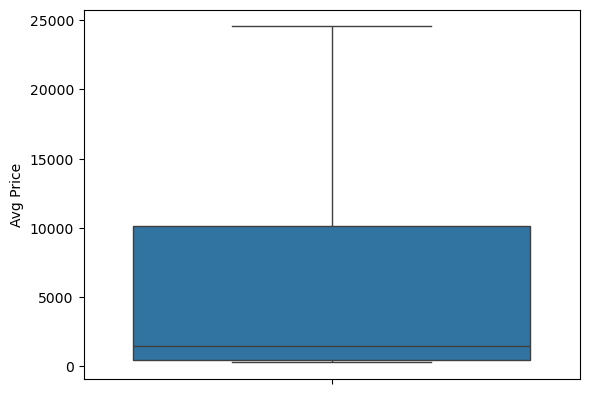

In [3]:
#capping outliers
not_outlier_value=avg.copy()
not_outlier_value.loc[(not_outlier_value["Avg Price"]>avgupperbound),"Avg Price"]=avgupperbound
not_outlier_value.loc[(not_outlier_value["Avg Price"]<avglowerbound),"Avg Price"]=avglowerbound
sns.boxplot(not_outlier_value["Avg Price"])